## Data Loading with API

In [1]:
import pandas as pd
import pickle

In [2]:
# Get access to cloud data
from boxsdk import Client, OAuth2
# Set up id/token in Box Developer
# access_token expired every 1 hour
auth = OAuth2(client_id='8ptdl1h7ai49m1inipceudon2mx7n992', client_secret='KWNc0o9DZboqFlUYgwZnpKLyjtyA8KE1',
              access_token='ycyprsb6HoCDQM3HIk7qGEkAc1xKsOVs')
client = Client(auth)

folder_id = "248384149984" # let's inspect material sector first
folder = client.folder(folder_id=folder_id).get()
for item in folder.get_items():
    print(f'{item.type.capitalize()} "{item.name}" has ID {item.id}')

In [9]:
from io import StringIO

file_id = "1440776442968" #In material sector, first company(AA) => earliest earing call (2007.2)
box_file = client.file(file_id=file_id).get()

print(f'{box_file.type.capitalize()} "{box_file.name}" has ID {box_file.id}')
file_content = box_file.content()
print(type(file_content))
csv_str = file_content.decode('utf-8')

df = pd.read_csv(StringIO(csv_str))
df.head()

File "AA20072.csv" has ID 1440776442968
<class 'bytes'>


,2007
0,2
1,2007-01-10 17:00:00
2,"Operator: Good afternoon, ladies and gentlemen..."
3,NaN


In [22]:
print(df.iloc[2,0])

Operator: Good afternoon, ladies and gentlemen, and welcome to the Alcoa 2007 second quarter earnings conference call. (Operator Instructions) I would now like to turn the call over to the Director of Investor Relations, Mr. Tony Thene. Please proceed, sir.
Tony Thene: Thank you. Good evening, and thank you for attending Alcoa's second quarter 2007 analyst conference. At today's conference, Chuck McLane, Vice President and Chief Financial Officer, will review the second quarter financial results, as well as current and next quarter's anticipated business condition. In addition, Alain Belda, Chairman and CEO, will then give an overview of the current market conditions and recent events. Before I turn it over to Chuck, I would like to remind everyone that the information discussed on this call contains forward-looking statements that involve future events and known and unknown risks and uncertainties, including current expectations regarding Alcoa's future performance and the potential b

In [42]:
# DON'T run this block again! just load the data from pkl file in the last code chunk

sector_id = "248312479114" # folder id of "sector:automobile"
# initialize client object
companies =  client.folder(folder_id=sector_id).get()
calls_automobiles = {}

for company in companies.get_items():
    # Save company_name as part of the final label
    company_name = company.name
    transcripts = client.folder(folder_id=company.id).get()
    print(company_name)
    # Loop over all earning call transcript for each company
    for transcript in transcripts.get_items():
        if transcript.name != "speaker names.csv":
            file = client.file(file_id=transcript.id).get()
            file_content = file.content()
            csv_str = file_content.decode('utf-8')
            df = pd.read_csv(StringIO(csv_str)).iloc[2,0]
            # The data look like (ticker, period): transcripts
            calls_automobiles[(company_name, transcript.name.rstrip(".csv")[-5:])] = df

ADNT
ALV
APTV
ARVL
AXL
AYRO
BWA
CPS
DAN
F
FOXF
FSR
GM
GNTX
GOEV
GT
GTX
HOG
KNDI
LEA
LI
MOD
MPAA
NIU
PATK
QS
RACE
REE
RIVN
SMP
SRI
SUP
THRM
TSLA
UFAB
VC
WGO
WKHS
XPEL
XPEV


In [82]:
print(len(calls_automobiles))
print(calls_automobiles.keys())

1186
dict_keys([('ADNT', '20172'), ('ADNT', '20173'), ('ADNT', '20174'), ('ADNT', '20181'), ('ADNT', '20182'), ('ADNT', '20183'), ('ADNT', '20184'), ('ADNT', '20191'), ('ADNT', '20192'), ('ADNT', '20193'), ('ADNT', '20194'), ('ADNT', '20201'), ('ADNT', '20202'), ('ADNT', '20203'), ('ADNT', '20204'), ('ADNT', '20211'), ('ADNT', '20212'), ('ADNT', '20213'), ('ADNT', '20214'), ('ADNT', '20221'), ('ADNT', '20222'), ('ADNT', '20223'), ('ADNT', '20224'), ('ALV', '20112'), ('ALV', '20113'), ('ALV', '20114'), ('ALV', '20121'), ('ALV', '20122'), ('ALV', '20123'), ('ALV', '20124'), ('ALV', '20131'), ('ALV', '20132'), ('ALV', '20133'), ('ALV', '20134'), ('ALV', '20141'), ('ALV', '20142'), ('ALV', '20143'), ('ALV', '20144'), ('ALV', '20151'), ('ALV', '20152'), ('ALV', '20153'), ('ALV', '20154'), ('ALV', '20161'), ('ALV', '20162'), ('ALV', '20163'), ('ALV', '20164'), ('ALV', '20171'), ('ALV', '20172'), ('ALV', '20173'), ('ALV', '20174'), ('ALV', '20181'), ('ALV', '20182'), ('ALV', '20183'), ('ALV',

In [62]:
'''
auth = OAuth2(client_id='8ptdl1h7ai49m1inipceudon2mx7n992', client_secret='KWNc0o9DZboqFlUYgwZnpKLyjtyA8KE1',
              access_token='ou3ZqXGQ3MIqfXBr58GGG95hzfjSqniZ')
client = Client(auth)


folder_id = "248314662588" # folder id of "sector"
# intialize client object
sectors =  client.folder(folder_id=folder_id).get()

calls = {}

# Loop over all sectors
for sector in sectors.get_items():
    companies = client.folder(folder_id=sector.id).get()
    print(sector.name)
    calls[sector.name] = {}

    # Loop over all companies in each sectors
    for company in companies.get_items():
        # Save company_name as part of the final label
        transcripts = client.folder(folder_id=company.id).get()
        print(company.name)

        # Loop over all earning call transcript for each company
        for transcript in transcripts.get_items():
            if transcript.name == "speaker names.csv":
                continue
            file = client.file(file_id=transcript.id).get()
            file_content = file.content()
            csv_str = file_content.decode('utf-8')
            # The data look like (ticker, period): transcripts
            calls[sector.name][(company.name, transcript.name.rstrip(".csv")[-5:])] = pd.read_csv(StringIO(csv_str)).iloc[2,0]
'''

automobiles
ADNT
ALV
APTV
ARVL
AXL
AYRO
BWA
CPS
DAN
F
FOXF
FSR
GM
GNTX
GOEV
GT
GTX
HOG
KNDI
LEA
LI
MOD
MPAA
NIU
PATK
QS
RACE
REE
RIVN
SMP
SRI
SUP
THRM
TSLA
UFAB
VC
WGO
WKHS
XPEL
XPEV
banks
ABCB
ACT
AGM
AMAL
AMTB
ASB
AUB
AX
BAC
BANC
BANR
BAP
BHLB
BKU
BOH
BOKF
BPOP
BRKL
BY
C
CADE
CASH
CATY
CBU
CFG
CFR
CMA
CNOB
COLB
COOP
CVBF
DCOM
EBC
EFSC
EGBN
ESNT
EWBC


Request "GET https://api.box.com/2.0/files/1440452159803/content" failed with ContentDecodingError exception: ContentDecodingError(DecodeError('Received response with content-encoding: gzip, but failed to decode it.', error('Error -3 while decompressing data: incorrect header check')))


ContentDecodingError: ('Received response with content-encoding: gzip, but failed to decode it.', error('Error -3 while decompressing data: incorrect header check'))

In [117]:
print(date)

[20063, 20064, 20071, 20072, 20073, 20074, 20081, 20082, 20083, 20084, 20091, 20092, 20093, 20094, 20101, 20102, 20103, 20104, 20111, 20112, 20113, 20114, 20121, 20122, 20123, 20124, 20131, 20132, 20133, 20134, 20141, 20142, 20143, 20144, 20151, 20152, 20153, 20154, 20161, 20162, 20163, 20164, 20171, 20172, 20173, 20174, 20181, 20182, 20183, 20184, 20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232]


total number of company in the automobile sector: 40
range of date (approximated years) earning calls covered: 17.0


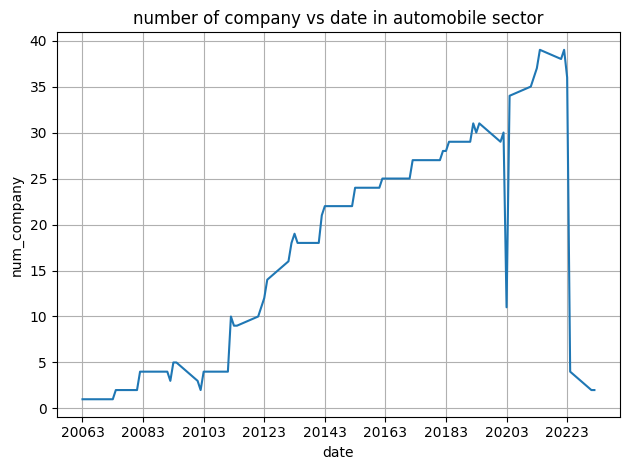

In [6]:
import matplotlib.pyplot as plt

# Generate dictionary with date of earning calls as a key
date_available = {}
for key in calls_automobiles:
    if key[1] not in date_available:
        date_available[key[1]] = 1
    else:
        date_available[key[1]] += 1
date_available = dict(sorted(date_available.items()))


c = set()
for key in calls_automobiles:
    c.add(key[0])
print("total number of company in the automobile sector:", len(c))
print("range of date (approximated years) earning calls covered:", len(date_available)/4)
date = [int(date) for date in list(date_available.keys())]
num_company = list(date_available.values())
plt.plot(date, num_company)
plt.xlabel("date")
plt.ylabel("num_company")
plt.title("number of company vs date in automobile sector")
plt.xticks(date[::8])
plt.tight_layout()
plt.grid()

In [128]:
# To save
with open('calls_automobile.pkl', 'wb') as f:
    pickle.dump(calls_automobiles, f)

In [5]:
# To load
with open('calls_automobile.pkl', 'rb') as f:
    calls_automobiles = pickle.load(f)

# Don't print calls directly, it is a dictionary with (ticker, period) as keys and with transcripts in the corresponding value
print(len(calls_automobiles))

1186
